<a href="https://colab.research.google.com/github/EdgarAgOr/FAP_Cheminformatic_PET/blob/main/8_PCA_and_tSNE_Binding_site_vs_CHEMBL_Molecules_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(20)
      # Instalar Pillow
      !pip -q install Pillow
      pbar.update(40)
      # Instalar molplotly
      !pip install molplotly
      pbar.update(60)
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(80)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import dash_bootstrap_components as dbc
from sys import argv

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


In [ ]:
FAP_CHEM = pd.read_csv('/content/Bioactividad_FAPCHEMBl_curada_data.csv')
FAP_CHEM.head()

,molecule_chemblid,canonical_smiles,bioactivity_class,standard_value,Data Set,Smiles standarization
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,Active,650.0,CHEMBl,Nope
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,Active,290.0,CHEMBl,Nope
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,Active,530.0,CHEMBl,Nope
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,Active,4.6,CHEMBl,Nope
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,Active,270.0,CHEMBl,Nope


In [ ]:
FAP_BS= pd.read_csv("/content/Bioactividad_FAPBSITE_curada_activos_data.csv")

FAP_BS.head(2)

,BindingDB_id,SMILES,bioactivity_class,IC50_nM,Data Set,Smiles standarization,Patente
0,22043,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,16985.0,Bsite,Nope,No
1,22044,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,13609.0,Bsite,Nope,No


In [ ]:
FAP_Mol= pd.read_csv("/content/FAP_Radiofarmacos_curada_data.csv")

FAP_Mol.head(2)

,Compuesto,SMILES,pEC50,Data Set,bioactivity_class
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active


In [ ]:
print(FAP_CHEM.columns)
print(FAP_BS.columns)
print(FAP_Mol.columns)

Index(['molecule_chemblid', 'canonical_smiles', 'bioactivity_class',
       'standard_value', 'Data Set', 'Smiles standarization'],
      dtype='object')
Index(['BindingDB_id', 'SMILES', 'bioactivity_class', 'IC50_nM', 'Data Set',
       'Smiles standarization', 'Patente'],
      dtype='object')
Index(['Compuesto', 'SMILES', 'pEC50', 'Data Set', 'bioactivity_class'], dtype='object')


In [ ]:
FAP_CHEM = FAP_CHEM[['molecule_chemblid', 'canonical_smiles','Data Set']]

FAP_BS= FAP_BS[['BindingDB_id', 'SMILES', 'Data Set']]

FAP_Mol = FAP_Mol[['Compuesto', 'SMILES', 'Data Set']]

In [ ]:
FAP_CHEM.columns = ["ID", "SMILES", "Data Set"]

FAP_BS.columns = ['ID', 'SMILES', 'Data Set']

FAP_Mol.columns = ['ID', 'SMILES', 'Data Set']

In [ ]:
 DATA = pd.concat([FAP_CHEM, FAP_BS, FAP_Mol], axis=0).reset_index(drop=True)

 DATA


,ID,SMILES,Data Set
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,CHEMBl
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,CHEMBl
...,...,...,...
1065,FAPI-55,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(cc...,Molecules
1066,18FFEQGP,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(OCC[18F])...,Molecules
1067,FluoFAPI,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(F)cc21,Molecules
1068,HBED-CC-FAPI-04,O=C(NCC(=O)N1CC(F)(F)C[C@H]1C#N)c1ccnc2ccc(OCC...,Molecules


In [ ]:
DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RotBonds"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["HetAtoms"] = [Descriptors.NumHeteroatoms(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["CSP3"] = [Descriptors.FractionCSP3(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["ARR"] = [Descriptors.NumAromaticRings(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["ALR"] = [Descriptors.NumAliphaticRings(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["NumRings"] = [Descriptors.RingCount(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

In [ ]:
DATA.head(2)

,ID,SMILES,Data Set,HBA,HBD,RotBonds,LogP,TPSA,CSP3,MW,NumRings
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,4,3,4,-0.0883,72.8,0.916667,254.139,2
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,4,3,4,0.6919,72.8,0.928571,282.193,2


In [ ]:
dataset = DATA[["Data Set", 'HBA','HBD','RotBonds', 'LogP', 'TPSA', 'CSP3', 'MW', 'NumRings']]

dataset.head(2)

,Data Set,HBA,HBD,RotBonds,LogP,TPSA,CSP3,MW,NumRings
0,CHEMBl,4,3,4,-0.0883,72.8,0.916667,254.139,2
1,CHEMBl,4,3,4,0.6919,72.8,0.928571,282.193,2


In [ ]:
#Dividir matriz
data = dataset.iloc[:,1:7].values # Seleccionar columnas con descriptores
label = dataset.iloc[:,0].values # Seleccionar el nombre de la base de datos(label) de las columnas

In [ ]:
pd.DataFrame(data).head(2)

,0,1,2,3,4,5
0,4.0,3.0,4.0,-0.0883,72.8,0.916667
1,4.0,3.0,4.0,0.6919,72.8,0.928571


In [ ]:
# Normalizar datos
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_std)
pca_results

array([[ 0.02203519,  2.54316945],
       [-0.07317556,  2.42144346],
       [-0.17194261,  2.28668518],
       ...,
       [-1.28971851, -0.58564619],
       [ 2.55945411, -1.86942665],
       [ 2.59384746, -1.81478772]])

In [ ]:
# Seleccionar impormación complementaria
label = DATA[["Data Set", "ID", "SMILES"]]
label = label.to_numpy()

In [ ]:
# Concatenar arrays de numpy
arr = np.concatenate((label, pca_results), axis = 1)
# Crear un nuevo dataframe
pca_dataset = pd.DataFrame(data=arr, columns = ['Data set',"ID", "SMILES",'component1', 'component2'])
pca_dataset.head(2)


,Data set,ID,SMILES,component1,component2
0,CHEMBl,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,0.022035,2.543169
1,CHEMBl,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,-0.073176,2.421443


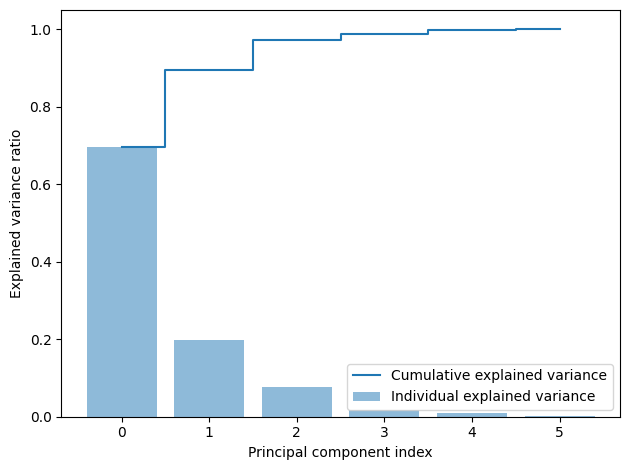

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
X_train_std = sc.transform(data)
#X_test_std = sc.transform(X_test)
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train_pca = pca.fit_transform(X_train_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
import matplotlib.pyplot as plt
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:

pca_dataset.head(2)

,Data set,ID,SMILES,component1,component2
0,CHEMBl,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,0.022035,2.543169
1,CHEMBl,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,-0.073176,2.421443


In [ ]:
set(list(pca_dataset["Data set"]))

{'Bsite', 'CHEMBl', 'Molecules'}

In [ ]:
#Graficar
import plotly.express as px
import molplotly
fig_pca = px.scatter(pca_dataset,
                            x='component1',
                            y='component2',
                            #symbol='Minimum Degree',
                            color='Data set',
                            color_discrete_sequence=["red", "green", 'yellow',],
                            title='PCA',
                            labels={'PC1': 'PC_1',
                                    'PC2': 'PC_2'},
                            width=700,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_pca,
                                         df=pca_dataset,
                                         smiles_col='SMILES',
                                         title_col='ID',
                                         color_col='Data set'
                                        )
#fig_pca.show()
#app_marker.run_server(mode='inline', port=8060, height=1000)
app_marker.run(port=8060)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1069 non-null   object 
 1   SMILES    1069 non-null   object 
 2   Data Set  1069 non-null   object 
 3   HBA       1069 non-null   int64  
 4   HBD       1069 non-null   int64  
 5   RotBonds  1069 non-null   int64  
 6   LogP      1069 non-null   float64
 7   TPSA      1069 non-null   float64
 8   CSP3      1069 non-null   float64
 9   MW        1069 non-null   float64
 10  NumRings  1069 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 92.0+ KB


In [ ]:
DATA.describe()

,HBA,HBD,RotBonds,LogP,TPSA,CSP3,MW,NumRings
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,6.913938,2.570627,7.756782,1.339041,129.234930,0.499424,497.555894,3.646399
std,4.777452,2.761750,8.554997,2.312274,97.159562,0.169238,281.686482,1.403693
min,2.000000,0.000000,1.000000,-9.192500,29.260000,0.153846,171.993000,0.000000
25%,4.000000,1.000000,4.000000,0.572600,85.230000,0.400000,360.417000,3.000000
50%,5.000000,1.000000,5.000000,1.923780,95.320000,0.454545,428.533000,4.000000
75%,7.000000,3.000000,7.000000,2.718080,114.350000,0.590909,481.578000,4.000000
max,57.000000,21.000000,114.000000,8.428200,978.140000,0.947368,3772.212000,17.000000


In [ ]:
DATA.to_csv("Comparacion_FAP_CHEMBL_BindingSite_Mol.csv", index = False)

In [ ]:
import pandas as pd

In [ ]:
# Estas son para analisis y visualizacion

import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
! pip install -q rdkit
! pip install -q molvs

import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from rdkit.Chem import AllChem

from rdkit.Chem import PandasTools

from rdkit.Chem import Descriptors

PandasTools.RenderImagesInAllDataFrames (images = True)

In [ ]:
print(DATA.columns)

### Con esto haremos solo un analisis del data set, haciendo un DF del dataset

In [ ]:
dataset = DATA[['HBA','HBD','RotBonds','LogP','TPSA','CSP3','MW','NumRings']]
dataset.head(2)

,HBA,HBD,RotBonds,LogP,TPSA,CSP3,MW,NumRings
0,4,3,4,-0.0883,72.8,0.916667,254.139,2
1,4,3,4,0.6919,72.8,0.928571,282.193,2


In [ ]:
#Dividir matriz
data = dataset.iloc[:,1:12].values # Seleccionar columnas con descriptores
label = dataset.iloc[:,0].values # Seleccionar el nombre de la base de datos(label) de las columnas

In [ ]:
pd.DataFrame(data).head(2)

,0,1,2,3,4,5,6
0,3.0,4.0,-0.0883,72.8,0.916667,254.139,2.0
1,3.0,4.0,0.6919,72.8,0.928571,282.193,2.0


In [ ]:
# Normalizar datos
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_std)
pca_results

array([[-0.46026402, -2.62128537],
       [-0.49388218, -2.46083933],
       [-0.53028297, -2.29092175],
       ...,
       [-1.31056806,  0.3310707 ],
       [ 3.14376459,  2.13221927],
       [ 3.11374218,  2.04651026]])

In [ ]:
# Seleccionar información complementaria
label = DATA[["Data Set", "ID", "SMILES"]]
label = label.to_numpy()

In [ ]:
# Concatenar arrays de numpy
arr = np.concatenate((label, pca_results), axis = 1)
# Crear un nuevo dataframe
pca_dataset = pd.DataFrame(data=arr, columns = ['Data Set',"ID", "SMILES",'PC1', 'PC2'])
pca_dataset.head(2)

,Data Set,ID,SMILES,PC1,PC2
0,CHEMBl,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,-0.460264,-2.621285
1,CHEMBl,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,-0.493882,-2.460839


In [ ]:
pca_dataset.to_csv ("PCA_FAP_ChemBL_BindingSite_data.csv", index = False)

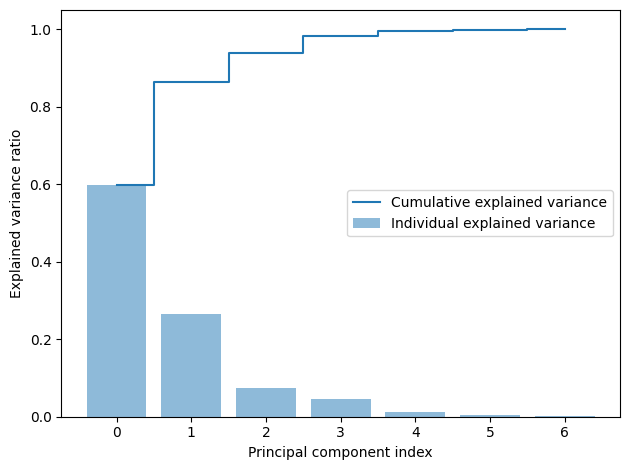

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
X_train_std = sc.transform(data)
#X_test_std = sc.transform(X_test)
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train_pca = pca.fit_transform(X_train_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
import matplotlib.pyplot as plt
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('explained_variance tario.pdf')

In [ ]:
pca_dataset.head(2)

,Data Set,ID,SMILES,PC1,PC2
0,CHEMBl,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,-0.460264,-2.621285
1,CHEMBl,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,-0.493882,-2.460839


In [ ]:
set(list(pca_dataset["Data Set"]))

{'Bsite', 'CHEMBl', 'Molecules'}

In [ ]:
#Graficar
import plotly.express as px
import molplotly
fig_pca = px.scatter(pca_dataset,
                            x='PC1',
                            y='PC2',
                            #symbol='Minimum Degree',
                            color='Data Set',
                            color_discrete_sequence=['red','green','orange'],
                            title='PCA_FAP',
                            labels={'PC1': 'PC1',
                                    'PC2': 'PC2'},
                            width=700,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_pca,
                                         df=pca_dataset,
                                         smiles_col='SMILES',
                                         title_col='ID',
                                         color_col='Data Set'
                                        )
#fig_pca.show()
#app_marker.run_server(mode='inline', port=8060, height=1000)
app_marker.run(port=8060)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [ ]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(25)
      # Instalar molplotly
      !pip install molplotly
      pbar.update(50)
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(75)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Importar blibliotecas
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist


In [ ]:
# Entrenar modelo t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["Data Set", "ID","SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)
tsne_results

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1087 samples in 0.004s...
[t-SNE] Computed neighbors for 1087 samples in 0.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1087
[t-SNE] Computed conditional probabilities for sample 1087 / 1087
[t-SNE] Mean sigma: 0.358134
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.476154
[t-SNE] KL divergence after 300 iterations: 0.575948


array([[  2.1878493, -11.429994 ],
       [  2.320625 , -11.143559 ],
       [  2.4291258, -10.906611 ],
       ...,
       [-11.045292 ,   2.3205113],
       [  7.84993  ,   1.6507658],
       [  7.835921 ,   1.6095521]], dtype=float32)

In [ ]:
# Seleccionar impormación complementaria
label = DATA[["Data Set", "ID", "SMILES"]]
label = label.to_numpy()
label.shape

(1087, 3)

In [ ]:
# Concatenar arrays de numpy
arr = np.concatenate((label, tsne_results), axis = 1)
arr.shape

(1087, 5)

In [ ]:
# Crear un nuevo dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['Data Set',"ID", "SMILES",'axis 1', 'axis 2'] )
tsne_dataset.head(2)
tsne_dataset.to_csv ("tsne_FAP_ChemBl_BindingSite_data.csv", index = False)

In [ ]:
# Graficar
import plotly.express as px
import molplotly
fig_tsne = px.scatter(tsne_dataset,
                            x='axis 1',
                            y='axis 2',
                            #symbol='Minimum Degree',
                            color='Data Set',
                            color_discrete_sequence=["red", "mediumturquoise", 'orange',],
                            title='t-SNE',
                            labels={'Axis 1': 'axis 1',
                                    'Axis 2': 'axis 2'},
                            width=600,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_tsne,
                                         df=tsne_dataset,
                                         smiles_col='SMILES',
                                         title_col='ID',
                                         color_col='Data Set'
                                        )

#fig_tsne.show()
#app_marker.run_server(mode='inline', port=8060, height=1000)
app_marker.run(port=8060)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>